In [74]:
import requests
import pandas as pd
import json

# FASE 1: EXTRACCIÓN (E de ETL)

Objetivo: Leer el archivo JSON correctamente en Google Colab.

In [75]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
response = requests.get(url)
data = response.json()

In [76]:
# Leer datos como DataFrame de Pandas
df = pd.read_json(url)

In [77]:
# Vista rápida de los primeros registros
print(df.head())

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

## FASE 2: TRANSFORMACIÓN (T de ETL)
Objetivo: Limpiar, tratar datos nulos, corregir tipos de datos y eliminar duplicados si existen.

# Conoces el conjunto de datos:

In [78]:
# Información general del DataFrame
print("Información general del dataset:")
df.info()

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


### Diccionario de datos

- **customerID**: número de identificación único de cada cliente  
- **Churn**: si el cliente dejó o no la empresa  
- **gender**: género (masculino y femenino)  
- **SeniorCitizen**: si tiene o no una edad igual o mayor a 65 años  
- **Partner**: si tiene o no una pareja  
- **Dependents**: si tiene o no dependientes  
- **tenure**: meses de contrato del cliente  
- **PhoneService**: suscripción al servicio telefónico  
- **MultipleLines**: suscripción a más de una línea telefónica  
- **InternetService**: suscripción a un proveedor de internet  
- **OnlineSecurity**: suscripción adicional de seguridad en línea  
- **OnlineBackup**: suscripción adicional de respaldo en línea  
- **DeviceProtection**: suscripción adicional de protección del dispositivo  
- **TechSupport**: suscripción adicional de soporte técnico  
- **StreamingTV**: suscripción de televisión por cable  
- **StreamingMovies**: suscripción de streaming de películas  
- **Contract**: tipo de contrato  
- **PaperlessBilling**: si prefiere recibir la factura en línea  
- **PaymentMethod**: forma de pago  
- **Charges.Monthly**: total mensual por todos los servicios del cliente  
- **Charges.Total**: total gastado por el cliente


In [79]:
from pandas import json_normalize
df_normalizado = json_normalize(data)
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [80]:
df_normalizado.head(30)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
5,0013-MHZWF,No,Female,0,No,Yes,9,Yes,No,DSL,...,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45
6,0013-SMEOE,No,Female,1,Yes,No,71,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25
7,0014-BMAQU,No,Male,0,Yes,No,63,Yes,Yes,Fiber optic,...,No,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.8
8,0015-UOCOJ,No,Female,1,No,No,7,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,48.20,340.35
9,0016-QLJIS,No,Female,0,Yes,Yes,65,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.45,5957.9


# Comprobación de incoherencias en los datos

In [81]:
# Verficar si hay valores unicos en cada columna
for col in df_normalizado.columns:
    print(f"valores únicos en la columna'{col}' : {df_normalizado[col].unique()}")
    if df_normalizado[col].nunique() < 50: #Imprima valores si no hay muchos
        print(df_normalizado[col].unique())
        print('-' * 50) #Linea divisoria mejor visualizacion.

valores únicos en la columna'customerID' : ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
valores únicos en la columna'Churn' : ['No' 'Yes' '']
['No' 'Yes' '']
--------------------------------------------------
valores únicos en la columna'customer.gender' : ['Female' 'Male']
['Female' 'Male']
--------------------------------------------------
valores únicos en la columna'customer.SeniorCitizen' : [0 1]
[0 1]
--------------------------------------------------
valores únicos en la columna'customer.Partner' : ['Yes' 'No']
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'customer.Dependents' : ['Yes' 'No']
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'customer.tenure' : [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 

In [82]:
# 1. Verificacion de duplicados
duplicados = df_normalizado.duplicated().sum()
print(f"Filas duplicadas duplicadas: {duplicados}")


Filas duplicadas duplicadas: 0


In [83]:
# 2. Verificacion si hay valores nulos
valores_nulos = df_normalizado.isnull(). values.sum()
print("\nValores nulos en cada columna:")
print(valores_nulos[valores_nulos > 0])



Valores nulos en cada columna:
[]


In [84]:
# 3. Valores blancos o vacios
valores_en_blanco_o_vacios = df_normalizado.apply(lambda x: x.astype (str).str.strip() == '').sum()
print("\nValores en blanco o vacíos en cada columna:")
print(valores_en_blanco_o_vacios[valores_en_blanco_o_vacios > 0])



Valores en blanco o vacíos en cada columna:
Churn                    224
account.Charges.Total     11
dtype: int64


In [85]:
#Cambiando la columna "account.Charges.Total" a Float

df_normalizado['account.Charges.Total'] = pd.to_numeric(df_normalizado['account.Charges.Total'], errors='coerce')
print(df_normalizado['account.Charges.Total'].dtype)

float64


In [86]:
# Eliminando las columnas de Churn
df_normalizado = df_normalizado[df_normalizado['Churn'].str.strip() != '']
print("Número de filas después de eliminar las vacías en 'Churn':", len(df_normalizado))

Número de filas después de eliminar las vacías en 'Churn': 7043


In [87]:
# Vacíos o en blanco
df_normalizado.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


##Cracion de columna de cuentas diarias.

In [88]:
df_normalizado['Cuentas_Diarias'] = df_normalizado['account.Charges.Monthly'] / 30
print(df_normalizado[['account.Charges.Monthly', 'Cuentas_Diarias']])

      account.Charges.Monthly  Cuentas_Diarias
0                       65.60         2.186667
1                       59.90         1.996667
2                       73.90         2.463333
3                       98.00         3.266667
4                       83.90         2.796667
...                       ...              ...
7262                    55.15         1.838333
7263                    85.10         2.836667
7264                    50.30         1.676667
7265                    67.85         2.261667
7266                    59.00         1.966667

[7043 rows x 2 columns]


/tmp/ipython-input-88-3905516695.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [89]:
df_normalizado

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


##Traducir nombres de columnas

In [90]:
df_normalizado.rename(columns={
    'customerID': 'ID_Cliente',
    'Churn': 'Evasion',
    'customer.gender': 'Genero',
    'customer.SeniorCitizen': 'AdultosMayores',
    'customer.Partner': 'TienePareja',
    'customer.Dependents': 'TieneDependientes',
    'customer.tenure': 'Meses',
    'phone.PhoneService': 'ServicioTelefono',
    'phone.MultipleLines': 'LineasMultiples',
    'internet.InternetService': 'Internet',
    'internet.OnlineSecurity': 'SeguridadOnline',
    'internet.OnlineBackup': 'BackupOnline',
    'internet.DeviceProtection': 'ProteccionDispositivo',
    'internet.TechSupport': 'SoporteTecnico',
    'internet.StreamingTV': 'TV',
    'internet.StreamingMovies': 'Peliculas',
    'account.Contract': 'TipoContrato',
    'account.PaperlessBilling': 'FacturaDigital',
    'account.PaymentMethod': 'MetodoPago',
    'account.Charges.Monthly': 'CargosMensuales',
    'account.Charges.Total': 'CargosTotales',
    'Cuentas_Diarias': 'CuentasDiarias'
}, inplace=True)



In [91]:
print(df_normalizado.columns.tolist())

['ID_Cliente', 'Evasion', 'Genero', 'AdultosMayores', 'TienePareja', 'TieneDependientes', 'Meses', 'ServicioTelefono', 'LineasMultiples', 'Internet', 'SeguridadOnline', 'BackupOnline', 'ProteccionDispositivo', 'SoporteTecnico', 'TV', 'Peliculas', 'TipoContrato', 'FacturaDigital', 'MetodoPago', 'CargosMensuales', 'CargosTotales', 'CuentasDiarias']


##Separacion por genero

In [92]:
df_normalizado['Genero'] = df_normalizado['Genero'].str.lower().map({
    'male': 'Masculino',
    'female': 'Femenino'
})


In [93]:
print("\n✅ Revisión de estructura después de la transformación:")
df_normalizado.info()
display(df_normalizado.head())



✅ Revisión de estructura después de la transformación:
<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID_Cliente             7043 non-null   object 
 1   Evasion                7043 non-null   object 
 2   Genero                 7043 non-null   object 
 3   AdultosMayores         7043 non-null   int64  
 4   TienePareja            7043 non-null   object 
 5   TieneDependientes      7043 non-null   object 
 6   Meses                  7043 non-null   int64  
 7   ServicioTelefono       7043 non-null   object 
 8   LineasMultiples        7043 non-null   object 
 9   Internet               7043 non-null   object 
 10  SeguridadOnline        7043 non-null   object 
 11  BackupOnline           7043 non-null   object 
 12  ProteccionDispositivo  7043 non-null   object 
 13  SoporteTecnico         7043 non-null   object 
 14  TV   

,ID_Cliente,Evasion,Genero,AdultosMayores,TienePareja,TieneDependientes,Meses,ServicioTelefono,LineasMultiples,Internet,...,ProteccionDispositivo,SoporteTecnico,TV,Peliculas,TipoContrato,FacturaDigital,MetodoPago,CargosMensuales,CargosTotales,CuentasDiarias
0,0002-ORFBO,No,Femenino,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Masculino,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Masculino,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Masculino,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Femenino,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


## CARGA Y ANALISIS

##Análisis Descriptivo

In [94]:
df_normalizado.describe()

,AdultosMayores,Meses,CargosMensuales,CargosTotales,CuentasDiarias
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,2.158723
std,0.368612,24.559481,30.090047,2266.771362,1.003002
min,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.500000,401.450000,1.183333
50%,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,0.000000,55.000000,89.850000,3794.737500,2.995000
max,1.000000,72.000000,118.750000,8684.800000,3.958333


##Recuento de evasión por variables categóricas

In [95]:
import plotly.express as px

In [96]:
px.histogram(df_normalizado, x = 'Genero', text_auto = True, color = 'Evasion', barmode = 'group')

In [97]:
px.histogram(df_normalizado, x = 'AdultosMayores', text_auto = True, color = 'Evasion', barmode = 'group')

In [98]:
px.histogram(df_normalizado, x = 'Meses', text_auto = True, color = 'Evasion', barmode = 'group')

In [99]:
# Agrupar por Meses y Evasion
df_grouped = df_normalizado.groupby(['Meses', 'Evasion']).size().unstack(fill_value=0)

# Calcular el % de Evasion por Mes
df_grouped['Evasion_rate'] = (df_grouped.get('Yes', 0) / df_grouped.sum(axis=1)) * 100

# Mostrar el resultado
print(df_grouped[['Evasion_rate']])

Evasion  Evasion_rate
Meses                
0            0.000000
1           61.990212
2           51.680672
3           47.000000
4           47.159091
...               ...
68           9.000000
69           8.421053
70           9.243697
71           3.529412
72           1.657459

[73 rows x 1 columns]


In [100]:
fig = px.line(df_grouped.reset_index(),
              x='Meses',
              y='Evasion_rate',
              markers=True,
              title='Tasa de Evasion (%) por Meses')
fig.show()

In [101]:
px.scatter(df_normalizado,
           x="Meses",
           y="CargosMensuales",
           color="Evasion",
           title="Meses vs Cargos mensuales por Evasion")

In [102]:
px.histogram(df_normalizado, x = 'TipoContrato', text_auto = True, color = 'Evasion', barmode = 'group')

In [103]:
px.box(df_normalizado, x = 'Evasion', y = 'CargosMensuales', color = 'Evasion')

In [104]:
px.histogram(df_normalizado, x = 'ServicioTelefono',  text_auto = True, color = 'Evasion', barmode = 'group')

In [105]:
px.histogram(df_normalizado, x = 'Internet',  text_auto = True, color = 'Evasion', barmode = 'group')

In [106]:
px.histogram(df_normalizado, x = 'TV',  text_auto = True, color = 'Evasion', barmode = 'group')

In [107]:
px.histogram(df_normalizado, x = 'MetodoPago',  text_auto = True, color = 'Evasion', barmode = 'group')

In [112]:
fig = px.box(
    df_normalizado,
    x='Evasion',
    y='CuentasDiarias',
    color='Evasion',
    title='Distribución de Cuentas Diarias por Evasion',
    labels={'Evasion': 'Evasion', 'CuentasDiarias': 'Cuenta Diaria ($)'}
)
fig.show()

# Informe Final – Análisis de Evasión de Clientes (Churn) – Telecom X

## 1. Introducción

Telecom X enfrenta un problema crítico: una elevada tasa de **evasión de clientes (churn)**, lo que afecta directamente sus ingresos y crecimiento sostenible.  
El objetivo de este análisis fue comprender **qué factores contribuyen a que un cliente cancele su contrato**, para luego aplicar modelos predictivos y diseñar estrategias efectivas de retención.

## 2. Limpieza y Tratamiento de Datos


- Se importaron datos desde un JSON anidado mediante una API de GitHub.
- Se aplicó **normalización** para desanidar campos como `customer`, `phone`, `internet` y `account`.
- Se renombraron columnas con nombres claros y en español.
- Se creó la variable `CuentasDiarias`.
- Se eliminaron nulos y valores inconsistentes.

## 3. Análisis Exploratorio de Datos (EDA)

###Género y Evasión
- No hay diferencias sustanciales entre hombres y mujeres en la tasa de churn.

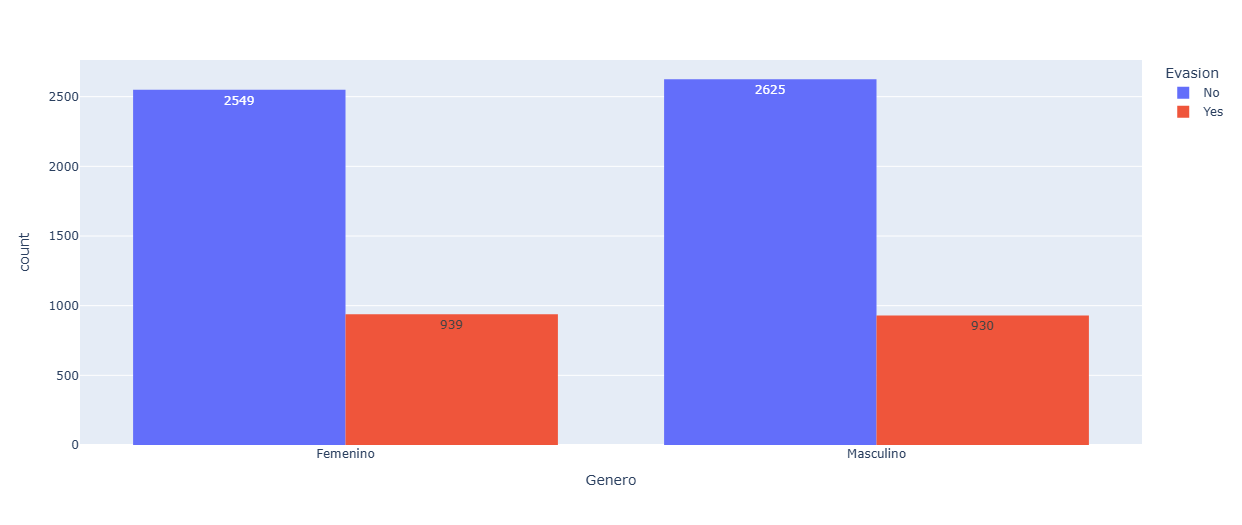


### Adultos Mayores

- Los clientes mayores a 65 años presentan **mayor tasa de evasión** que el promedio.

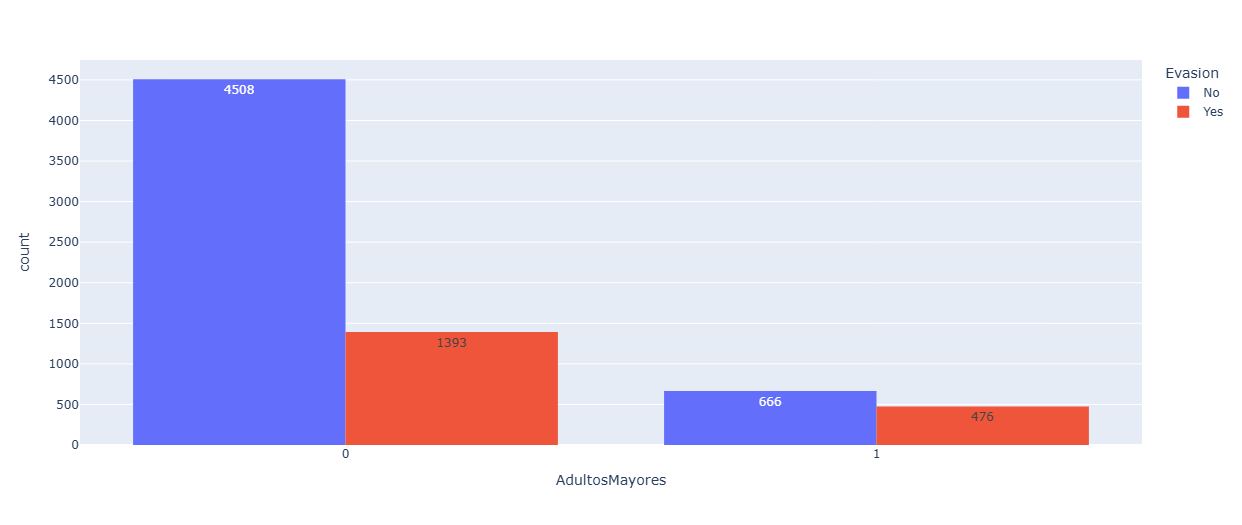

###Tiempo de Contrato (MesesCliente)

- La tasa de evasión es **más alta en clientes con menos de 10 meses** de relación.

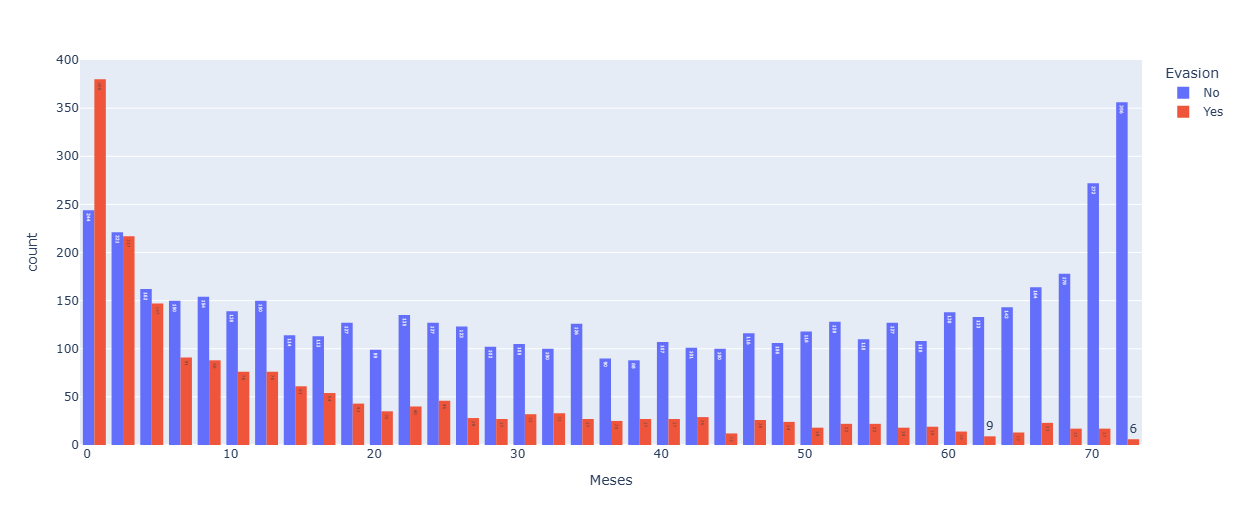

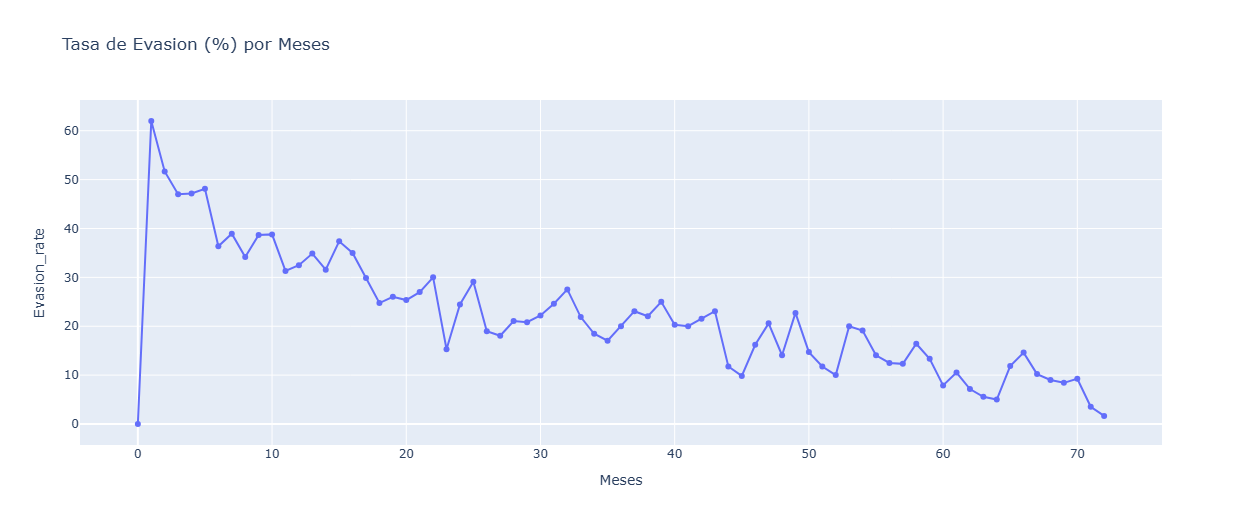

###Cargos Mensuales y Cuentas Diarias

- Clientes que se fueron tienden a pagar un poco más por día o mes.
- Hay mayor dispersión en cargos diarios para los que se van.

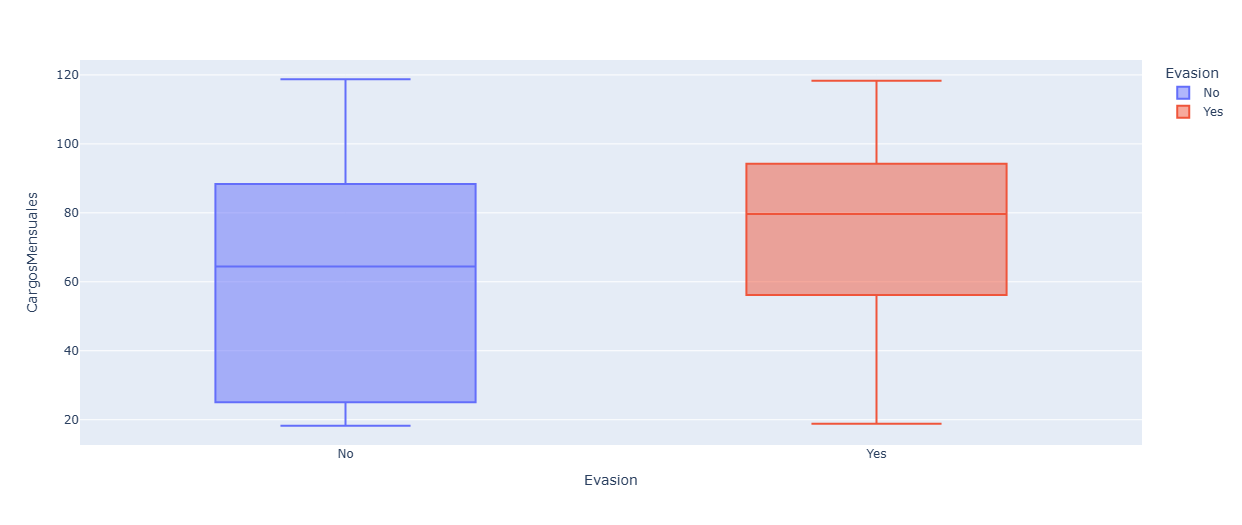

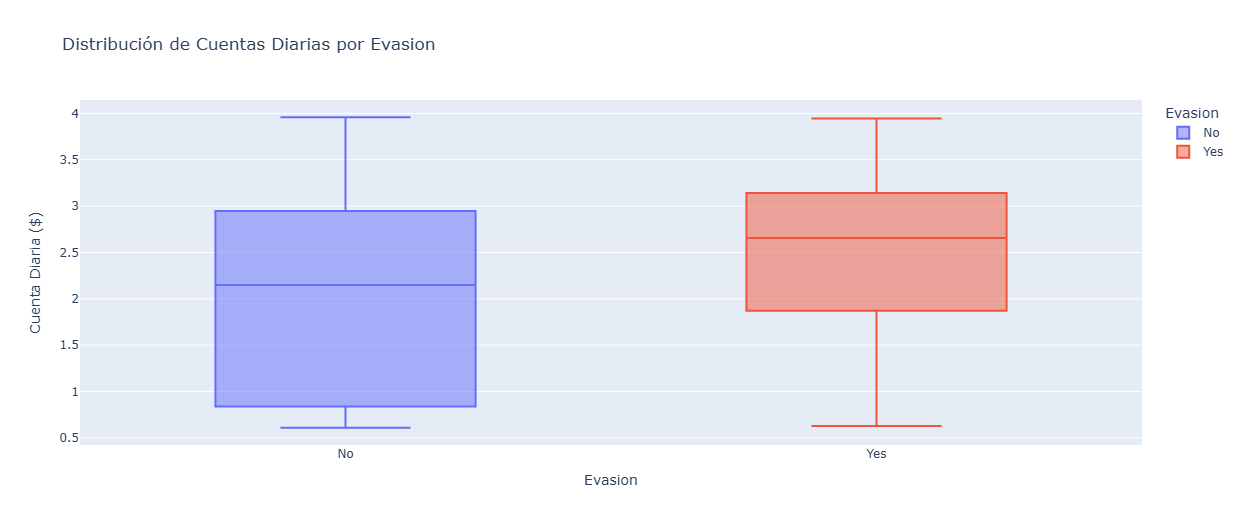

###Tipo de Contrato

- Contratos mensuales tienen una **tasa de evasión significativamente mayor** que contratos anuales.

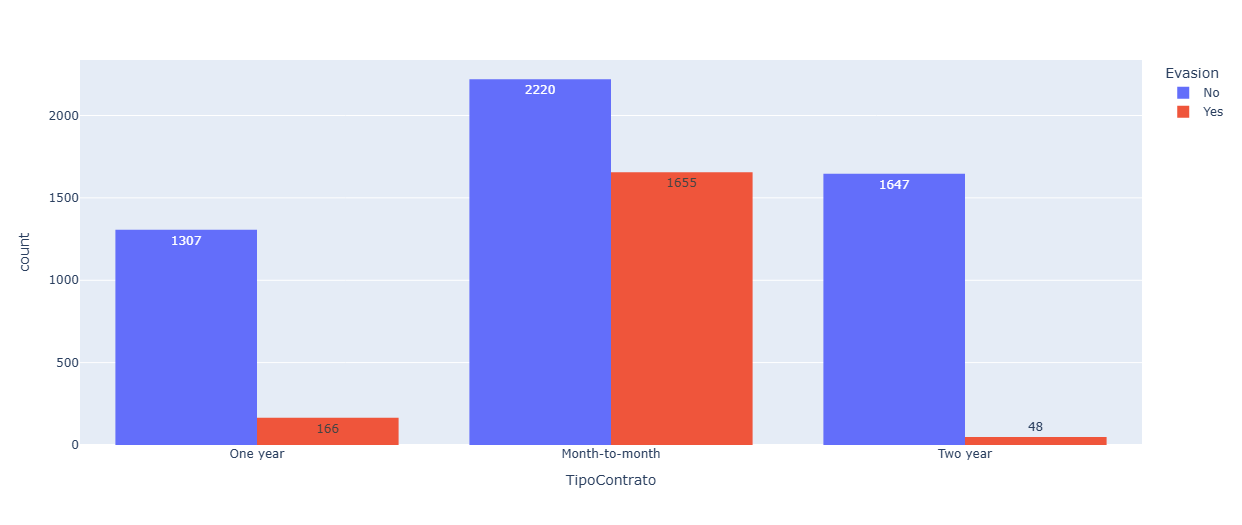

###Servicios Contratados

- Clientes que solo tienen Internet tienden a irse más.
- Servicios adicionales como **TV** o **Teléfono** ayudan a retener al cliente.

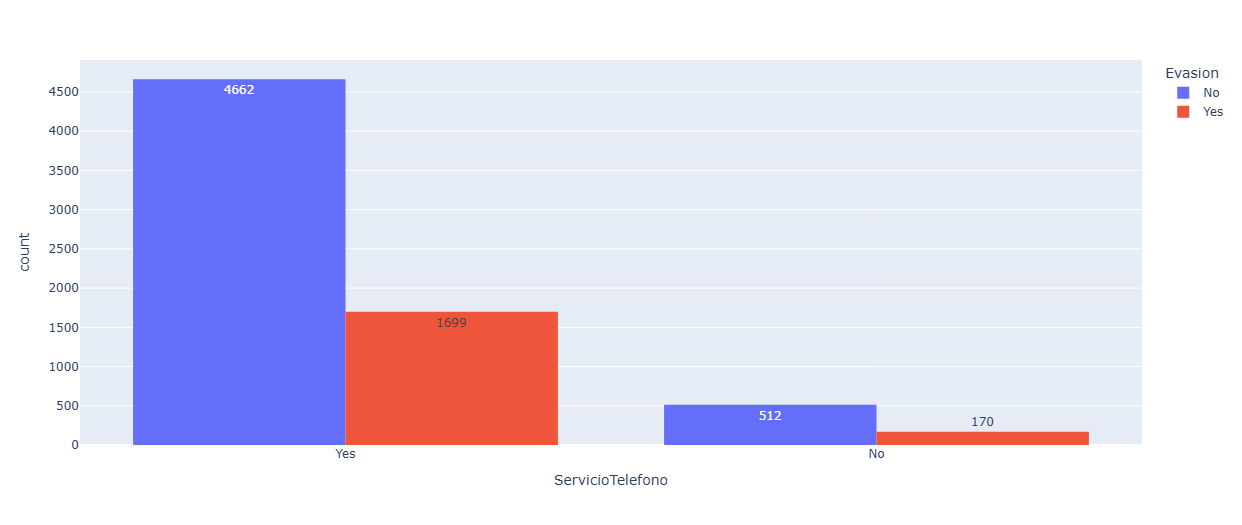

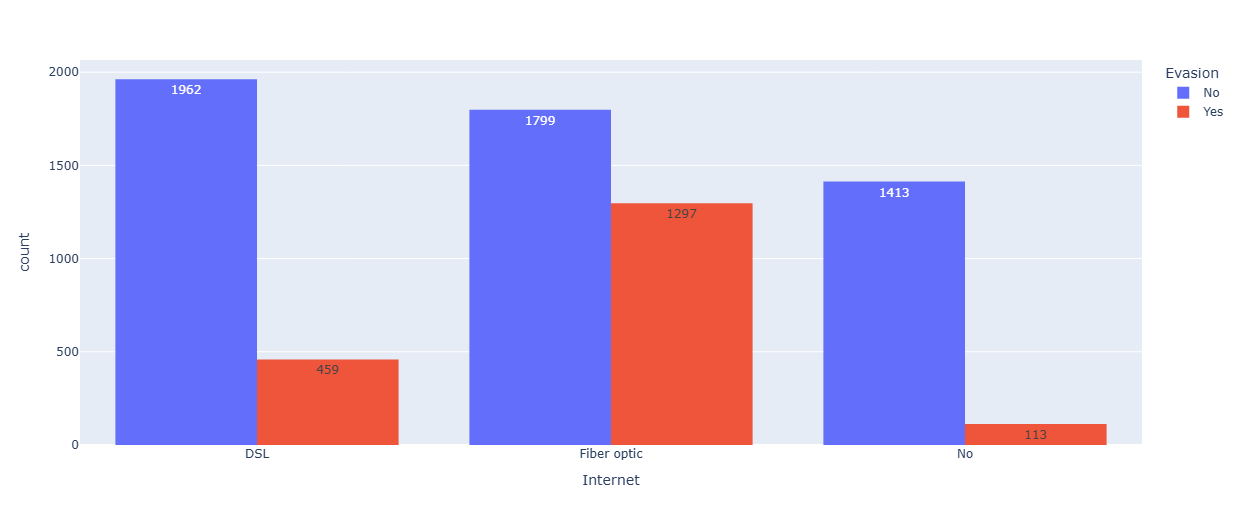

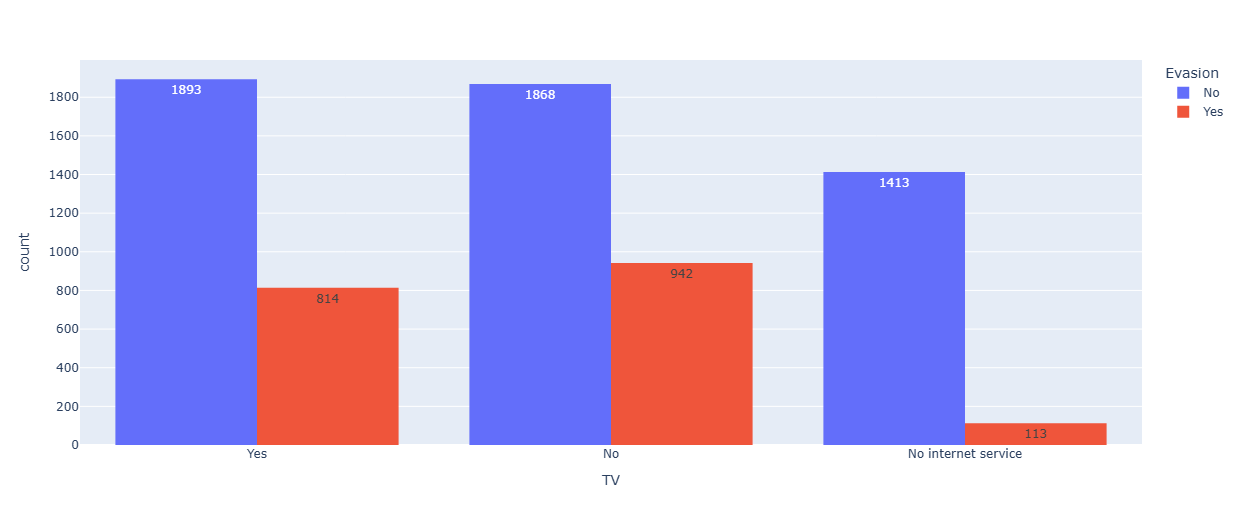

###Método de Pago

- El método de pago **Electronic Check** se asocia con **mayor evasión**.

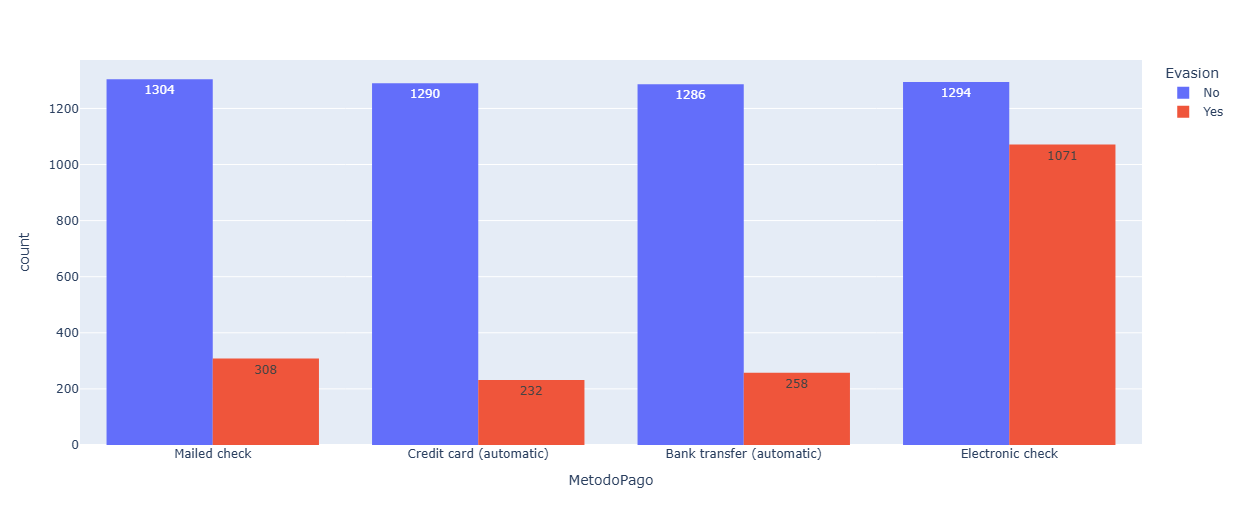

## 4. Conclusiones e Insights


- La Evasion se concentra en los primeros meses de contrato.
- Clientes con **contrato mensual** son más propensos a cancelar.
- Servicios combinados como TV o Teléfono ayudan a reducir evasión.
- El **método de pago** es un factor influyente: los pagos automatizados retienen más.
- Adultos mayores tienen una ligera tendencia a desertar más.

## 5. Recomendaciones

- Implementar **bonificaciones o beneficios exclusivos durante los primeros 6 meses** de contrato.
- Promover la migración de contrato mensual a **contratos anuales o bianuales**.
- Incentivar la contratación de **paquetes combinados de servicios**.
- Fomentar el uso de **métodos de pago automáticos** como tarjeta o débito.
- Utilizar estos insights para **entrenar modelos predictivos de Evasion** y actuar de forma preventiva.